# 2024-1 DSL 정규세션 과제

## SVM

- 작성자 : 윤형진
- 참고자료 : sklearn document
- 과제 제출 기한 : 02.03

---
- 이름 : 윤정수    
- 기수 : 11기    



In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for pynndescent>=0.5 from https://files.pythonhosted.org/packages/4e/82/0b9851a2fd4da9b57d7931446f5ebab92a98f1f35d3dc0dae5f9ed50a462/pynndescent-0.5.11-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86837 sha256=068bf4e4ae787132e7d46b5eaea69f8bd0737d5f6e7fc2d12a00e46e86d5f88c
  Stored in directory: /Users/jeongsooyoon/Library/Caches/pip/wheels/de/07/2e/814a6ee82e37528f2044a609a431028375b149bc31f03c0e27
Successfully built umap-learn


# 1. SVM을 이용한 심장병 예측 모델

해당 섹션에서는 범주형 데이터 더미 변수화, 전처리, train_test_split, confusion matrix까지 그려보는 전체적인 머신러닝 프로젝트 과정을 실습해보도록 하겠습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
import seaborn as sns
import umap

In [2]:
# heart.csv 데이터셋을 로드해주세요
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 데이터 전처리
- 범주형 데이터 : pd.get_dummies(데이터 프레임, columns = 범주형 데이터를 담은 칼럼들의 리스트, drop_first = True)
- 데이터 스케일링 : 연속형 데이터에 대해서 스케일링

In [3]:
label = df["HeartDisease"]

df_processed = df.drop(columns=["HeartDisease"])

# 범주형 데이터를 전처리해줍니다
categorical_col =  ["Sex", "ChestPainType", "RestingECG" , "ExerciseAngina" , "ST_Slope" ]

df_processed=pd.get_dummies(df_processed,columns=categorical_col,drop_first=True)

# 데이터 스케일링
scaler = StandardScaler()

for feature in ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]:
    df_processed[feature] = scaler.fit_transform(pd.DataFrame(df_processed[feature]))

df_processed["HeartDisease"] = label

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    float64
 4   MaxHR              918 non-null    float64
 5   Oldpeak            918 non-null    float64
 6   Sex_M              918 non-null    bool   
 7   ChestPainType_ATA  918 non-null    bool   
 8   ChestPainType_NAP  918 non-null    bool   
 9   ChestPainType_TA   918 non-null    bool   
 10  RestingECG_Normal  918 non-null    bool   
 11  RestingECG_ST      918 non-null    bool   
 12  ExerciseAngina_Y   918 non-null    bool   
 13  ST_Slope_Flat      918 non-null    bool   
 14  ST_Slope_Up        918 non-null    bool   
 15  HeartDisease       918 non-null    int64  
dtypes: bool(9), float64(6), in

In [4]:
df_processed.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,True,True,False,False,True,False,False,False,True,0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,False,False,True,False,True,False,False,True,False,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,True,True,False,False,False,True,False,False,True,0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,False,False,False,False,True,False,True,True,False,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,True,False,True,False,True,False,False,False,True,0


## Train dataset, Test Dataset 분할

In [5]:
train, test = train_test_split(df_processed, test_size=0.2, random_state=777)

print(f"Train Dataset Size : {train.shape}", f"Test Dataset Size : {test.shape}")

Train Dataset Size : (734, 16) Test Dataset Size : (184, 16)


In [6]:
x_train, y_train = train.iloc[:, :-1], train.iloc[:,-1]
x_test, y_test = test.iloc[:, :-1], test.iloc[:,-1]

## 다양한 조건으로 실험 진행

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [8]:
def Run_Classification(name : str, model : object, x_train : object, y_train : object, x_test:object, y_test:object):

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cf_matrix = confusion_matrix(y_test, y_pred)
    cf_matrix = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='crest', linewidth=.5)
    cf_matrix = cf_matrix.get_figure()

    print(f"Classification Result of {name}", "\n")
    print(f"accuracy : {acc}", "\n")
    print(f"report : {report}", "\n")

    plt.show()
    plt.close()

    print("-"*100)

# 커널의 종류에 따른 모델 퍼포먼스 비교

Classification Result of linear 

accuracy : 0.8152173913043478 

report :               precision    recall  f1-score   support

           0       0.84      0.74      0.79        85
           1       0.80      0.88      0.84        99

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184
 



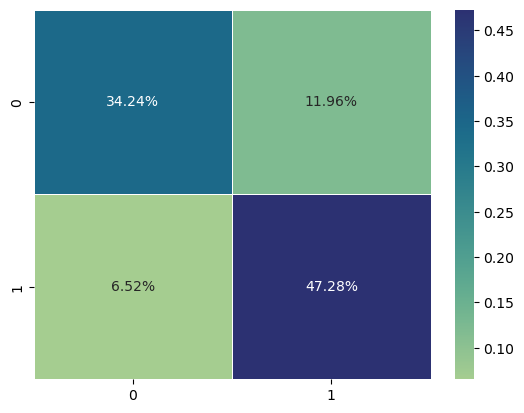

----------------------------------------------------------------------------------------------------
Classification Result of rbf_kernel 

accuracy : 0.8695652173913043 

report :               precision    recall  f1-score   support

           0       0.89      0.82      0.85        85
           1       0.86      0.91      0.88        99

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184
 



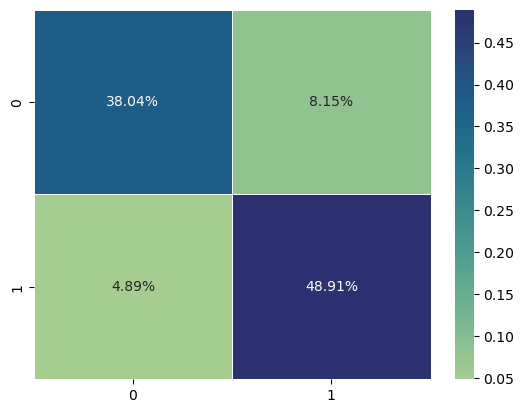

----------------------------------------------------------------------------------------------------
Classification Result of poly_kernel 

accuracy : 0.8586956521739131 

report :               precision    recall  f1-score   support

           0       0.87      0.81      0.84        85
           1       0.85      0.90      0.87        99

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184
 



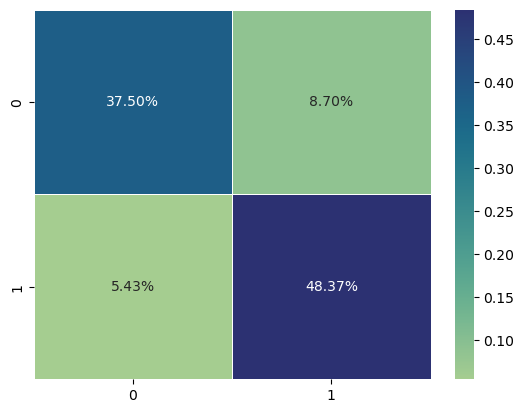

----------------------------------------------------------------------------------------------------


In [10]:
kernel_models = {"linear" : SVC(kernel="linear"),
                 "rbf_kernel" : SVC(kernel="rbf"),
                 "poly_kernel" : SVC(kernel="poly")}

for kernel_type, model in kernel_models.items():
  Run_Classification(kernel_type, model, x_train, y_train, x_test, y_test)

## C Parameter와 Soft/Hard Margin SVM
- C parameter는 SVM의 Regularization 파라미터로서, 클수록 Hard Margin SVM의 방향으로 학습됩니다.
<br>
(즉, 테스트 데이터셋에서 한 개의 miss-classification도 허용하지 않는 방향으로)
<br>
    - 이상치가 적은 경우 : 큰 C
    <br>
    - 이상치가 많은 경우 : 작은 C

Classification Result of rbf_SVC_C=0.5 

accuracy : 0.8532608695652174 

report :               precision    recall  f1-score   support

           0       0.87      0.80      0.83        85
           1       0.84      0.90      0.87        99

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184
 



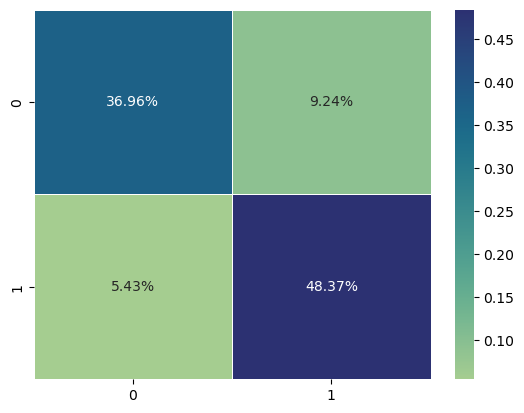

----------------------------------------------------------------------------------------------------
Classification Result of rbf_SVC_C=1 

accuracy : 0.8695652173913043 

report :               precision    recall  f1-score   support

           0       0.89      0.82      0.85        85
           1       0.86      0.91      0.88        99

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184
 



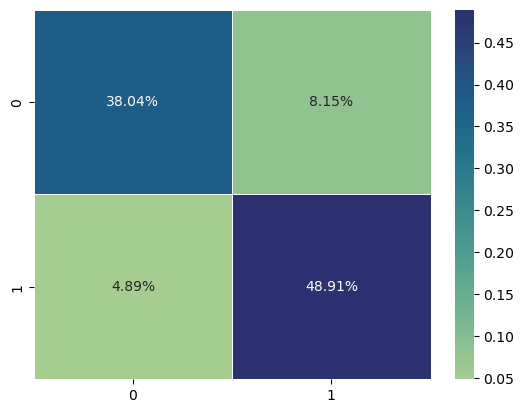

----------------------------------------------------------------------------------------------------
Classification Result of rbf_SVC_C=3 

accuracy : 0.8532608695652174 

report :               precision    recall  f1-score   support

           0       0.88      0.79      0.83        85
           1       0.83      0.91      0.87        99

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184
 



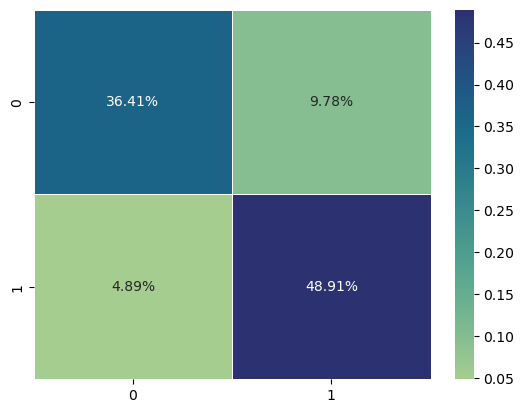

----------------------------------------------------------------------------------------------------
Classification Result of rbf_SVC_C=4 

accuracy : 0.842391304347826 

report :               precision    recall  f1-score   support

           0       0.86      0.79      0.82        85
           1       0.83      0.89      0.86        99

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184
 



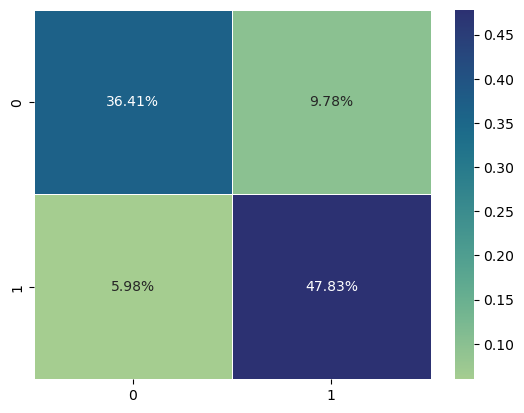

----------------------------------------------------------------------------------------------------
Classification Result of rbf_SVC_C=5 

accuracy : 0.842391304347826 

report :               precision    recall  f1-score   support

           0       0.86      0.79      0.82        85
           1       0.83      0.89      0.86        99

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184
 



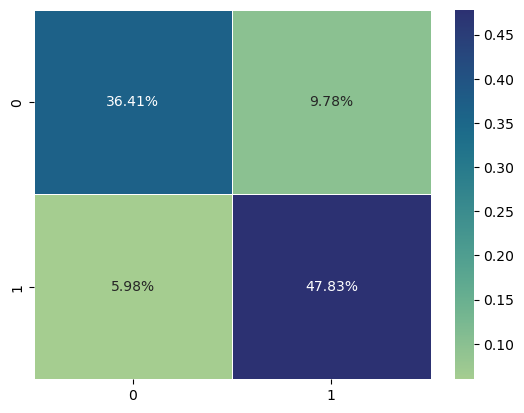

----------------------------------------------------------------------------------------------------
Classification Result of rbf_SVC_C=10 

accuracy : 0.8260869565217391 

report :               precision    recall  f1-score   support

           0       0.84      0.78      0.80        85
           1       0.82      0.87      0.84        99

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184
 



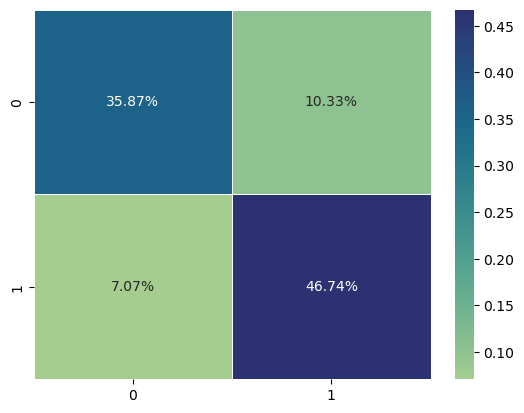

----------------------------------------------------------------------------------------------------


In [11]:
c_models = {'rbf_SVC_C=0.5': SVC(C=0.5),
            'rbf_SVC_C=1': SVC(C=1),
            'rbf_SVC_C=3': SVC(C=3),
            'rbf_SVC_C=4': SVC(C=4),
            'rbf_SVC_C=5': SVC(C=5),
            'rbf_SVC_C=10': SVC(C=10)}

for name, model in c_models.items():
  Run_Classification(name, model, x_train, y_train, x_test, y_test)

# gamma 파라미터와 RBF Kernel

RBF 함수가 각 데이터 포인트와 이웃 데이터 포인트의 유사도를 계산하는 함수의 일종이었다는 걸 기억하시나요?
gamma 파라미터는 그중에서도 한 데이터 포인트로부터 유사하다고 판단되는 거리를 조절하는 파라미터로, gamma가 커질수록 더 좁은 반경의 데이터 포인트만을 유사하다고 판단하게 됩니다.

<br>

즉, gamma가 클수록, 경계곡면 (decision boundary)는 데이터의 분포에 더 예민하게 반응하여, 더 굴곡지게 됩니다. 따라서 적절한 크기의 gamma는 더 정확한 경계곡면이 학습되도록 도와줄 수도 있지만, 과도한 경우 overfitting을 야기시킵니다.

Classification Result of rbf_SVC_gamma=0.2 

accuracy : 0.8206521739130435 

report :               precision    recall  f1-score   support

           0       0.85      0.74      0.79        85
           1       0.80      0.89      0.84        99

    accuracy                           0.82       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184
 



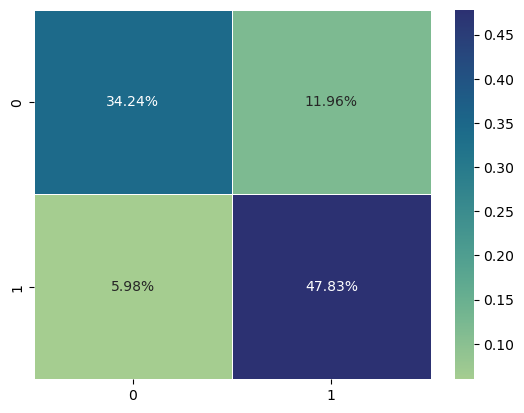

----------------------------------------------------------------------------------------------------
Classification Result of rbf_SVC_gamma=0.5 

accuracy : 0.8532608695652174 

report :               precision    recall  f1-score   support

           0       0.87      0.80      0.83        85
           1       0.84      0.90      0.87        99

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184
 



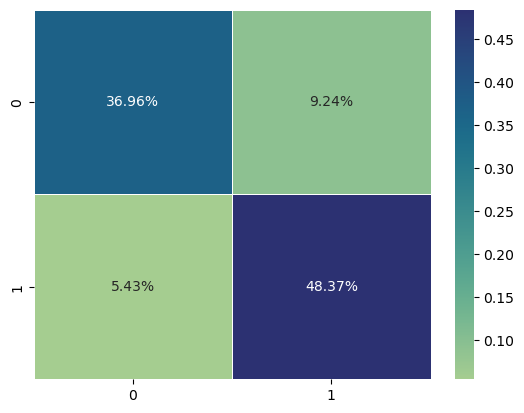

----------------------------------------------------------------------------------------------------
Classification Result of rbf_SVC_gamma=1 

accuracy : 0.8695652173913043 

report :               precision    recall  f1-score   support

           0       0.89      0.82      0.85        85
           1       0.86      0.91      0.88        99

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184
 



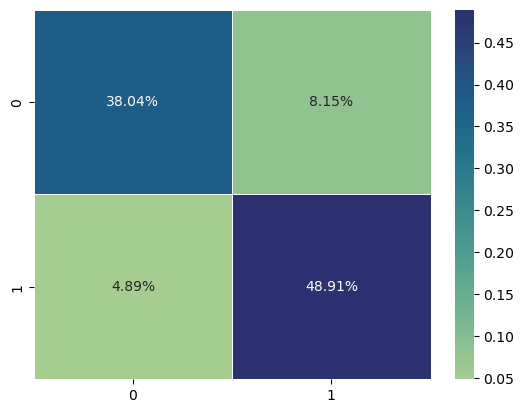

----------------------------------------------------------------------------------------------------
Classification Result of rbf_SVC_gamma=4 

accuracy : 0.842391304347826 

report :               precision    recall  f1-score   support

           0       0.86      0.79      0.82        85
           1       0.83      0.89      0.86        99

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184
 



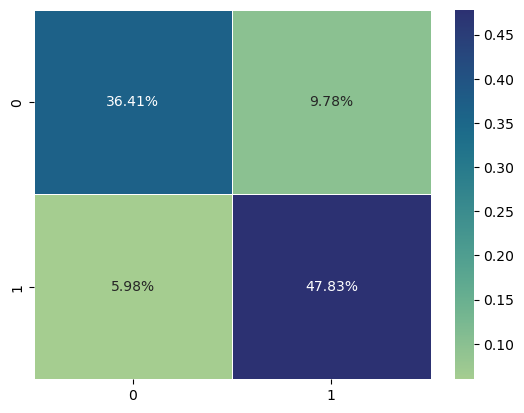

----------------------------------------------------------------------------------------------------
Classification Result of rbf_SVC_gamma=8 

accuracy : 0.8315217391304348 

report :               precision    recall  f1-score   support

           0       0.84      0.79      0.81        85
           1       0.83      0.87      0.85        99

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184
 



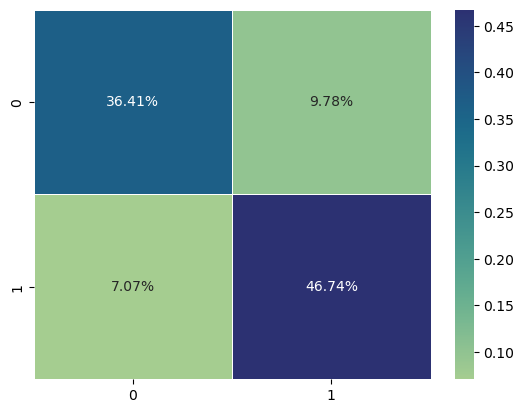

----------------------------------------------------------------------------------------------------
Classification Result of rbf_SVC_gamma=16 

accuracy : 0.8260869565217391 

report :               precision    recall  f1-score   support

           0       0.83      0.79      0.81        85
           1       0.83      0.86      0.84        99

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184
 



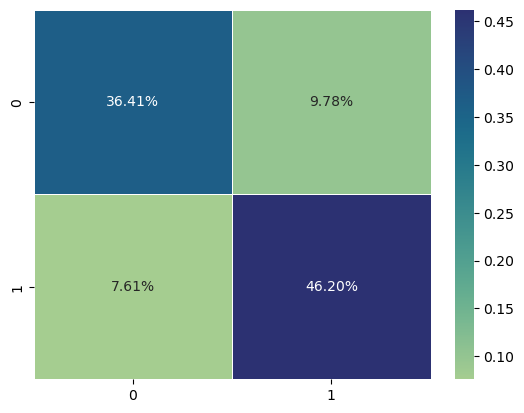

----------------------------------------------------------------------------------------------------


In [12]:
gamma_models = {'rbf_SVC_gamma=0.2': SVC(C=0.2),
                'rbf_SVC_gamma=0.5': SVC(C=0.5),
                'rbf_SVC_gamma=1': SVC(C=1),
                'rbf_SVC_gamma=4': SVC(C=4),
                'rbf_SVC_gamma=8': SVC(C=8),
                'rbf_SVC_gamma=16': SVC(C=16)}

for name, model in gamma_models.items():
  Run_Classification(name, model, x_train, y_train, x_test, y_test)

# 2. 여러 파라미터에 의한 결정 경계 변화 시각화

일전에 C 파라미터를 통한 Soft/Harm Margin SVM 조절을, gamma 파라미터를 통해 경계곡면의 굴곡도를 조정하는 것이 Model Metric에 어떤 영향을 주는 지 관찰했습니다. 이 변화를 시각화하기 위해서는 15 차원인 데이터를 2차원으로 축소할 필요가 있습니다.

<br>

해당 섹션에서는 UMAP의 힘을 빌려 파라미터 변화에 따른 경계곡면의 변화 양상을 시각화하도록 하겠습니다.

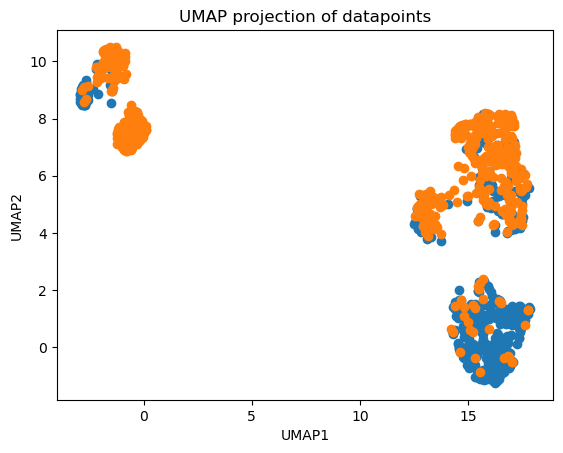

In [13]:
umap_instance = umap.UMAP(metric="cosine")
embedding = umap_instance.fit_transform(df_processed.iloc[:, :-1])
embedding_df = pd.DataFrame(embedding)
embedding_df["HeartDisease"] = df_processed["HeartDisease"]

# Get unique classes
classes = embedding_df["HeartDisease"].unique()

# Create a scatter plot for each class
for i, class_ in enumerate(classes):
    plt.scatter(embedding_df[embedding_df["HeartDisease"]==class_].iloc[:,0],
                embedding_df[embedding_df["HeartDisease"]==class_].iloc[:,1],
                label=f'Class {class_}')

plt.title('UMAP projection of datapoints')
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()


In [14]:
train, test = train_test_split(embedding_df, test_size = 0.3, random_state=777)

x_train, y_train = train.iloc[:, :-1], train.iloc[:,-1]
x_test,  y_test  = test.iloc[:, :-1],  test.iloc[:,-1]

## 2-1. Kernel 종류에 따른 경계 곡면 변화 시각화

In [15]:
models = dict()

models["rbf"] = SVC(C = 4,  kernel="rbf")
models["poly"] = SVC(C = 4, kernel="poly")
models["linear"] = SVC(C=4, kernel="linear")

poly_svc = models["poly"].fit(x_train, y_train)
rbf_svc = models["rbf"].fit(x_train, y_train)
linear_svc = models["linear"].fit(x_train, y_train)

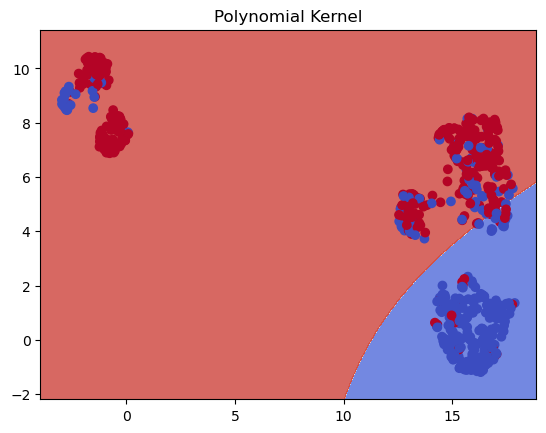

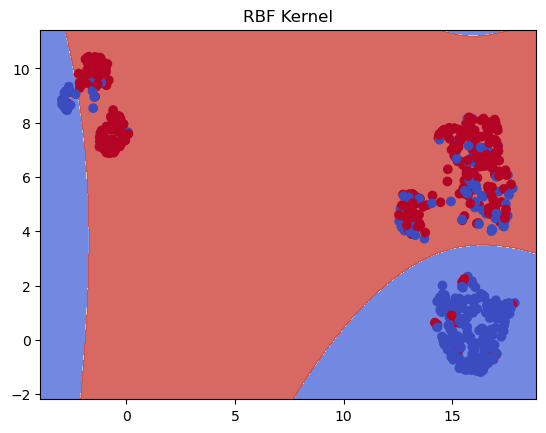

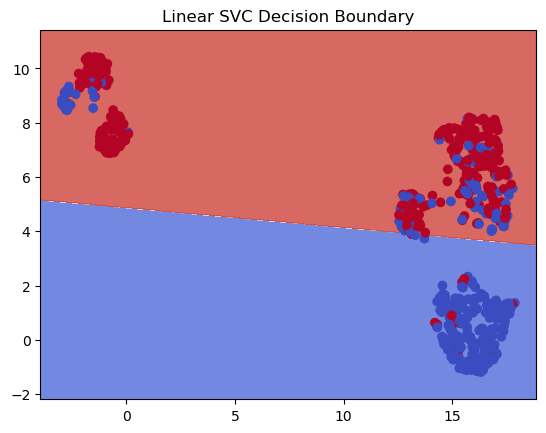

In [16]:
h = .02
x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary for polynomial kernel
Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title('Polynomial Kernel')
plt.show()

# Plot the decision boundary for RBF kernel
Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title('RBF Kernel')
plt.show()

# Plot the decision boundary for linear kernel
Z = linear_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title('Linear SVC Decision Boundary')
plt.show()

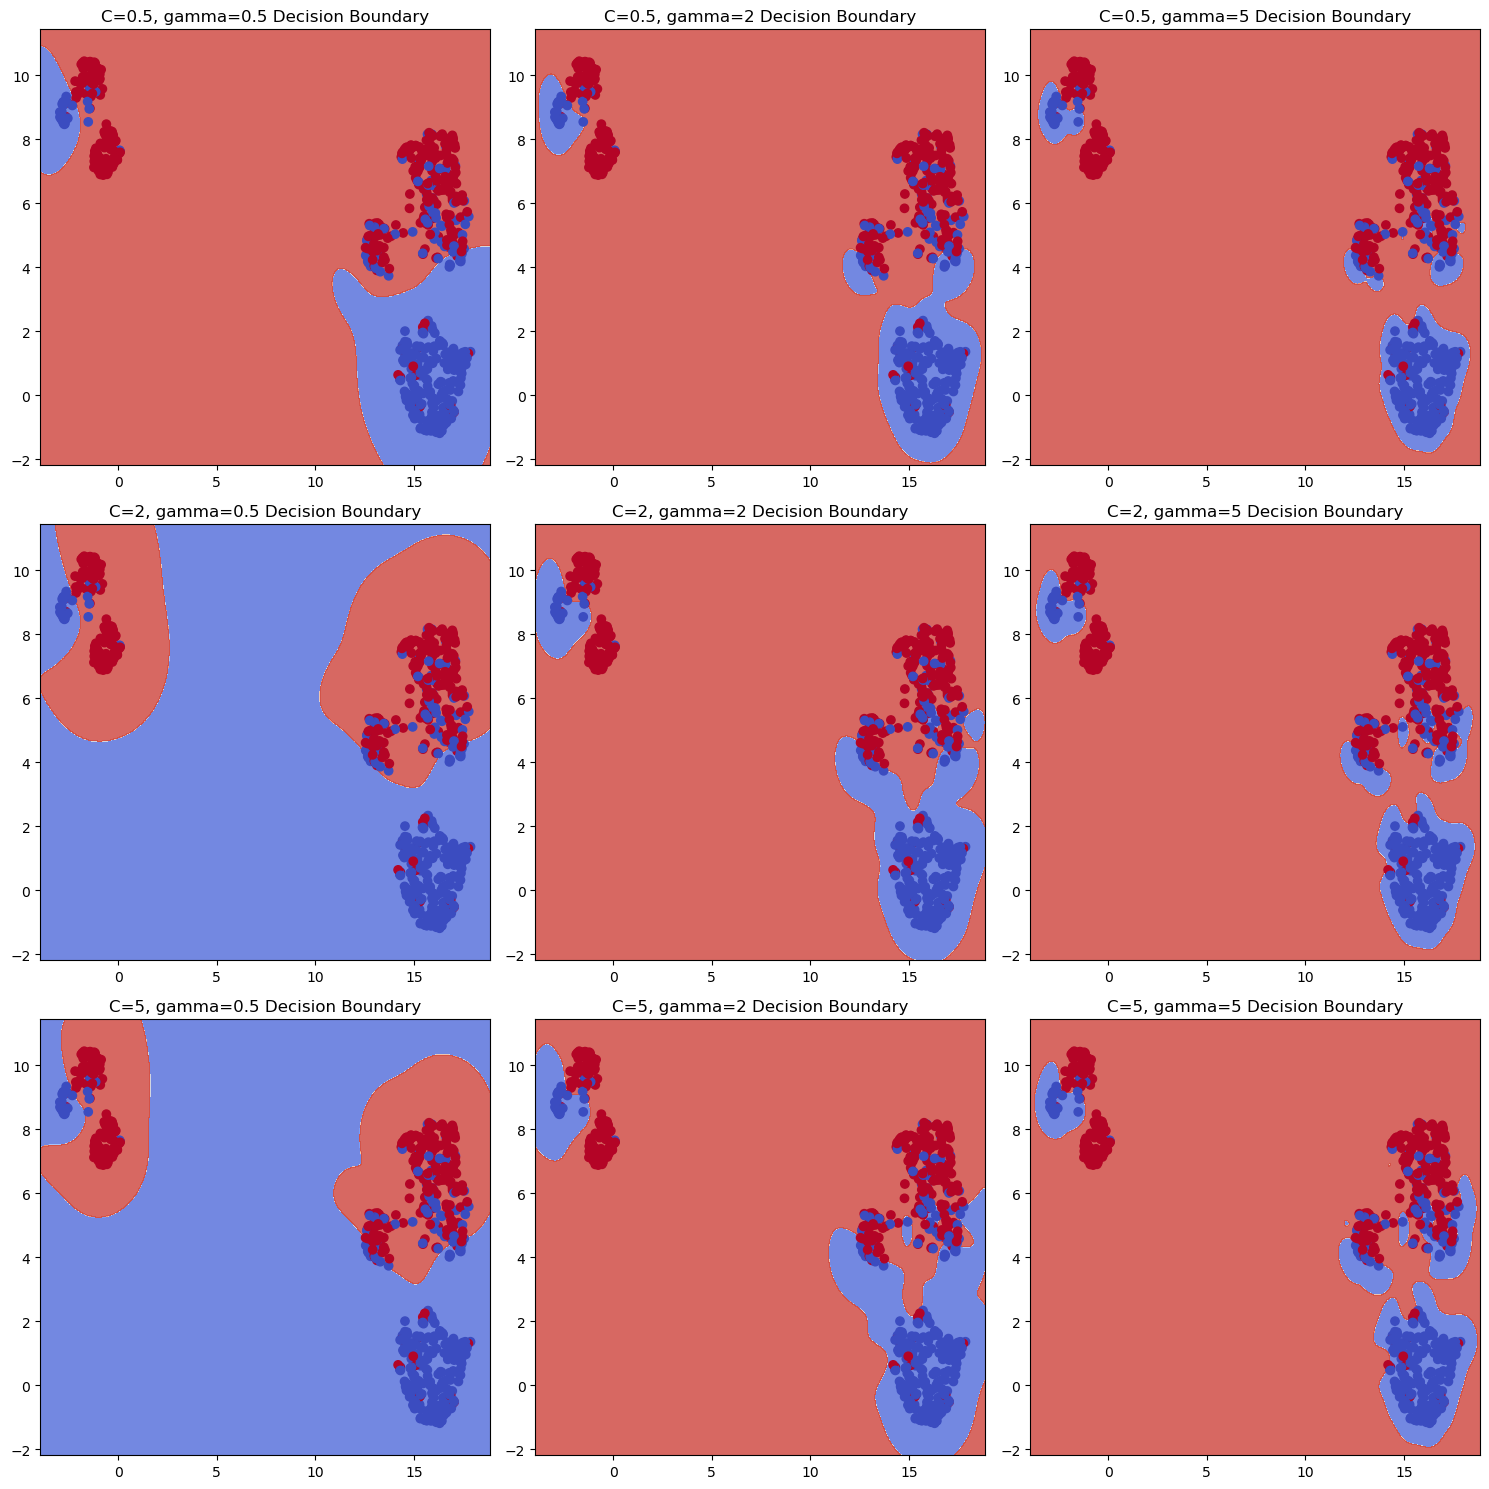

In [17]:
rbf_models = {"C=0.5, gamma=0.5" : SVC(C=0.5, gamma = 0.5, kernel="rbf"), "C=0.5, gamma=2"  : SVC(C=0.5, gamma = 2, kernel="rbf"), "C=0.5, gamma=5" : SVC(C=0.5, gamma = 5, kernel="rbf"),
              "C=2, gamma=0.5"   : SVC(C=2, gamma = 0.5, kernel="rbf"),   "C=2, gamma=2"    : SVC(C=2, gamma = 2, kernel="rbf"),   "C=2, gamma=5"   : SVC(C=2, gamma = 5, kernel="rbf"),
              "C=5, gamma=0.5"   : SVC(C=5, gamma = 0.5, kernel="rbf"),   "C=5, gamma=2"   : SVC(C=5, gamma = 2, kernel="rbf"),   "C=5, gamma=5"   : SVC(C=5, gamma = 5, kernel="rbf")}

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()

for i, (name, model) in enumerate(rbf_models.items()):
  rbf_svc = model.fit(x_train, y_train)

  h = .02
  x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
  y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


  Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  axs[i].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  axs[i].scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm)
  axs[i].set_title(f'{name} Decision Boundary')

plt.tight_layout()
plt.show()


# 3. 문제
위의 예시를 참고하여 적절한 파라미터를 가진 SVC를 이용해 87% 이상의 accuracy를 내도록 하십시오. accuracy, f1 score와 함께 confusion matrix도 함께 plot 해주세요.

(Run_Classification() 함수를 사용해도 좋습니다.)

### 맨 아래 0.875까지 나오는 것 확인

Best Parameters: {'C': 1, 'degree': 3, 'gamma': 0.5, 'kernel': 'rbf'}
Classification Result of SVC with GridSearchCV 

accuracy : 0.8152173913043478 

report :               precision    recall  f1-score   support

           0       0.87      0.71      0.78        85
           1       0.78      0.91      0.84        99

    accuracy                           0.82       184
   macro avg       0.83      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184
 



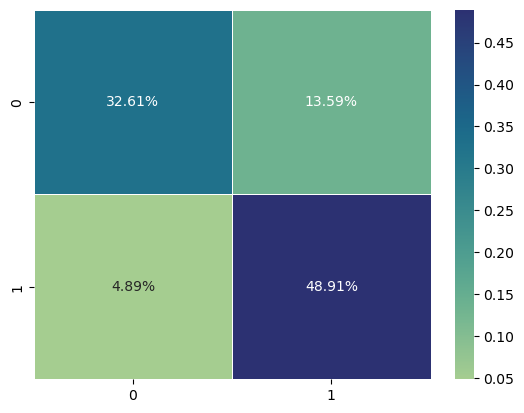

----------------------------------------------------------------------------------------------------


In [11]:
from sklearn.model_selection import GridSearchCV

# SVC 모델
svc_model = SVC()

# 탐색할 하이퍼파라미터 그리드
param_grid = {
    'C': [1, 2, 2.5, 3],  # C 값 범위 설정
    'kernel': ['rbf'],  # 커널 유형 설정
    'gamma': [0.5,1],  # gamma 설정
    'degree': [3]  # 다항식 차수 설정  # 독립 항 설정
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 탐색 수행
grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델 추출
best_svc_model = grid_search.best_estimator_

# 최적의 모델로 분류 실행
Run_Classification("SVC with GridSearchCV", best_svc_model, x_train, y_train, x_test, y_test)


In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score

Best Param=  {'C': 1.023912338746514, 'gamma': 0.1425429924689796, 'kernel': 'rbf'}
Classification Result of SVC with GridSearchCV 

accuracy : 0.875 

report :               precision    recall  f1-score   support

           0       0.89      0.84      0.86        85
           1       0.87      0.91      0.89        99

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184
 



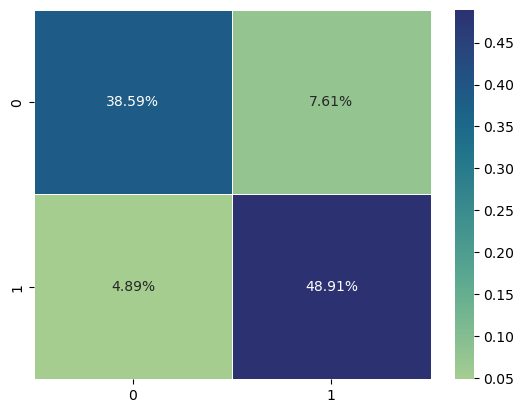

----------------------------------------------------------------------------------------------------


In [155]:
# uniform(a,b) <- a에서 시작해서 b만큼 폭을 가진 균일한(모든 값들이 동일한 확률을 가진) 연속형 확률 분포를 생성하는 것. 즉 a~a+b까지가 범위
param_dist = {
    'C': uniform(0.7, 1),             
    'gamma': uniform(0.1, 0.15),       
    'kernel': ['rbf']
}
# C=0.9, gamma = 0.11, 성공한거: c= 1.5, gamma =0.15
random_search = RandomizedSearchCV(svc_model, param_distributions=param_dist, n_iter=10, scoring='accuracy')

random_search.fit(x_train, y_train)

print("Best Param= ", random_search.best_params_)
#print("Best Score= ", random_search.best_score_)

# 최적의 모델 추출
best_svc_random_model = random_search.best_estimator_

# 최적의 모델로 분류 실행
Run_Classification("SVC with GridSearchCV", best_svc_random_model, x_train, y_train, x_test, y_test)


Classification Result of hi 

accuracy : 0.875 

report :               precision    recall  f1-score   support

           0       0.90      0.82      0.86        85
           1       0.86      0.92      0.89        99

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184
 



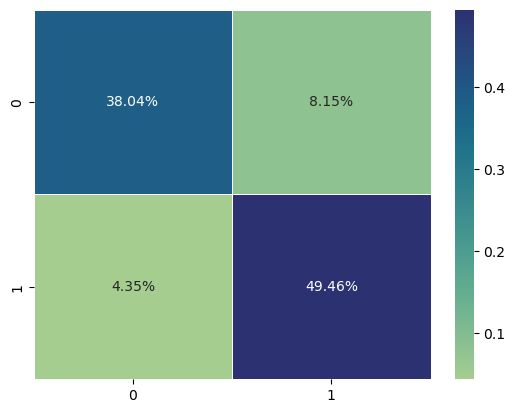

----------------------------------------------------------------------------------------------------


In [136]:
#kernel = 'rbf' 사용, gamma, C 조정 필요
#my_model = {"C= 0.8, gamma=0.11" : SVC(C=0.8, gamma = 0.10164626971959932, kernel="poly")} <- 0.8641304347826086 
#my_model = {"C= 0.8, gamma=0.11" : SVC(C=0.9, gamma = 0.11, kernel="rbf")} <-accuracy : 0.8695652173913043
#my_model = {"hi" : SVC(C = 1.5362196205592147, gamma = 0.15200654655565382, kernel = 'rbf')} <- 0.875 굿!
#Best Param=  {'C': 1.023912338746514, 'gamma': 0.1425429924689796, 'kernel': 'rbf'} <- 0.875
my_model = {"hi" : SVC(C = 1.5362196205592147, gamma = 0.15200654655565382, kernel = 'rbf')}

for name, model in my_model.items():
    Run_Classification(name, model, x_train, y_train, x_test, y_test)